In [373]:
!pip install --upgrade pandas
!pip install catboost -q
!pip install seaborn -q

Files removed: 3



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 12.1/12.1 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB 4.6 MB/s eta 0:00:00
     -------------------------------------- 514.2/514.2 kB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 6.1 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732051 sha256=80323ba7621f8840121f187eac4ad18713b20dc53161bd0c4b0a1c8f1b12947c
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\74\47\c4\678b0a3d5213e2f8500f3ea0f8dc3c81478e5b806c557dff58
Successfully built pymeeus



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [188]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import openpyxl

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from slugify import slugify

# print module versions for reproducibility
print('CatBoost version {}'.format(cb.__version__))
print('NumPy version {}'.format(np.__version__))
print('Pandas version {}'.format(pd.__version__))

In [2]:
# path configurator

path_m = r'C:\\Users\\user\\Desktop\\10\\'
events_by_cat = path_m+'5_Типы событий, регистрируемых по типу объекта многоквартирный дом.xlsx'
work_types_by_support = path_m+'5_Типы событий, регистрируемых по типу объекта многоквартирный дом.xlsx'
work_types_by_cap = path_m+'4_Виды работ по капитальному ремонту многоквартирных домов.xlsx'
works_done = path_m+'3_Работы по капитальному ремонту, проведенные в многоквартирных домах.xlsx'
incidents = path_m+'2_Инциденты,_зарегистрированные_на_объектах_городского_хозяйства.xlsx'
multi_houses_characts = path_m+'1_Многоквартирные дома с технико-экономическими характеристиками.xlsx'

In [301]:
# function to process area
def deffer_area(input_val):
    total_area = 0
    val_total_area = int(input_val)
    if val_total_area <= 10:
        total_area = 10
        return total_area
    if val_total_area <= 50:
        total_area = 50
        return total_area
    if val_total_area <= 100:
        total_area = 100
        return total_area
    if val_total_area <= 150:
        total_area = 150
        return total_area
    if val_total_area <= 200:
        total_area = 200
        return total_area
    if val_total_area <= 250:
        total_area = 250
        return total_area
    if val_total_area <= 300:
        total_area = 300
        return total_area
    if val_total_area <= 500:
        total_area = 500
        return total_area
    if val_total_area <= 1000:
        total_area = 1000
        return total_area
    if val_total_area <= 5000:
        total_area = 5000
        return total_area
    if val_total_area <= 10000:
        total_area = 10000
        return total_area
    if val_total_area <= 15000:
        total_area = 15000
        return total_area
    if val_total_area <= 20000:
        total_area = 20000
        return total_area
    if val_total_area <= 25000:
        total_area = 25000
        return total_area
    if val_total_area <= 30000:
        total_area = 30000
        return total_area
    if val_total_area <= 35000:
        total_area = 35000
        return total_area
    if val_total_area <= 40000:
        total_area = 40000
        return total_area
    if val_total_area <= 45000:
        total_area = 45000
    return total_area

# function to preprocess some russian strings to slugs
def slug_me(str_inp):
    if type(str_inp) == str:
        str_inp = str_inp.replace('Российская Федерация, город Москва, ', '')
        if ', к.' in str_inp:
            str_inp = str_inp.split(',')[0:2]
            str_inp = ''.join(str_inp)
        if 'муниципальный округ' in str_inp:
            str_inp = str_inp.split(',')[1:3]
            str_inp = ''.join(str_inp)
        str_inp = str_inp.replace('Дом по адресу ', '')
        str_inp = str_inp.replace('Адрес ', '')
        str_inp = str_inp.replace('дом ', '')
        str_inp = str_inp.replace('район ', '')
        str_inp = str_inp.replace('улица ', '')
        str_inp = str_inp.replace('ул.', '')
        str_inp = str_inp.replace('д.', '')
        str_inp = str_inp.replace(',', '')
        rez = slugify(str_inp, allow_unicode=False, lowercase=True, save_order=True, separator="_")
        return rez
    else:
        rez = 'err'

print(slug_me("Дом по адресу Красковская ул., д.121А"))
print(slug_me("Дом по адресу Рокоссовского Маршала бульв., д.7, к.4"))
print(slug_me("внутригородская территория муниципальный округ Косино-Ухтомский, улица Дмитриевского, дом 5"))
print(slug_me("внутригородская территория муниципальный округ Преображенское, Большая Черкизовская улица, дом 30, корпус 5"))
print(slug_me("Российская Федерация, город Москва, внутригородская территория муниципальный округ Богородское, Краснобогатырская улица, дом 21"))

kraskovskaia_121a
rokossovskogo_marshala_bulv_7
dmitrievskogo_5
bolshaia_cherkizovskaia_30
krasnobogatyrskaia_21


In [105]:
# load xlsx datasets to mem

df_incidents = pd.read_excel(incidents)
df_multi_houses_characts = pd.read_excel(multi_houses_characts)
df_work_types_by_cap = pd.read_excel(work_types_by_cap)
df_events_by_cat = pd.read_excel(events_by_cat)
df_works_done = pd.read_excel(works_done)

UsageError: Line magic function `%%timeit` not found.


In [130]:
# create a tmp dataframes to avoid changing of originals

df_incidents_tmp = df_incidents
df_multi_houses_characts_tmp = df_multi_houses_characts
df_work_types_by_cap_tmp = df_work_types_by_cap
df_events_by_cat_tmp = df_events_by_cat
df_works_done_tmp = df_works_done

# filling NaNs with nulls

df_incidents_tmp = df_incidents_tmp.fillna(0)
df_multi_houses_characts_tmp = df_multi_houses_characts_tmp.fillna(0)
df_work_types_by_cap_tmp = df_work_types_by_cap_tmp.fillna(0)
df_events_by_cat_tmp = df_events_by_cat_tmp.fillna(0)
df_works_done_tmp = df_works_done_tmp.fillna(0)

In [574]:
df_inc = df_incidents_tmp
df_inc['Дата создания во внешней системе'] = pd.to_datetime(df_incidents['Дата создания во внешней системе'], errors='coerce')
df_inc['Дата закрытия'] = pd.to_datetime(df_incidents['Дата закрытия'], errors='coerce')

df_inc['time_delta'] = (df_inc['Дата закрытия'] - df_inc['Дата создания во внешней системе']) / np.timedelta64(1, 'D')

In [428]:
df_inc

incident_name source                  address     unom  external_create_date_year  external_create_date_month  external_create_date_day  done_date_year  done_date_month  done_date_day  close_date_year  close_date_month  close_date_day  time_delta
0                                                 otkryt_kolodets    MVK  malaia_semionovskaia_13  2115191                       2022                           8                        30            1970                1              1           2022.0               8.0            30.0    0.040666
1                    otklonenie_gvs_nizhe_normy_nochiu_monitoring  ASUPR          dmitrievskogo_5  2404461                       2022                           2                        20            1970                1              1           2022.0               4.0             4.0   42.846703
2                      otklonenie_gvs_nizhe_normy_dnem_monitoring  ASUPR          dmitrievskogo_5  2404461                       2022                           3                         7            1970                1              1           2022.0               3.0             9.0    1.520415
3                                     temperatura_gvs_nizhe_normy  ASUPR          dmitrievskogo_5  2404461                       2022                           3                         5            1970                1              1           2022.0               3.0             5.0   -0.124685
4                                     temperatura_gvs_nizhe_normy  ASUPR          dmitrievskogo_5  2404461                       2022                           2                        18            1970                1              1           2022.0               2.0            18.0   -0.124761
...                                                           ...    ...                      ...      ...                        ...                         ...                       ...             ...              ...            ...              ...               ...             ...         ...
1048570  otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia    EDC    2_ia_vladimirskaia_46     4086                       2022                          11                        23            2022               11             23           2022.0              11.0            23.0    0.018086
1048571                  temperatura_v_kvartire_nizhe_normativnoi    EDC    2_ia_vladimirskaia_46     4086                       2022                          11                        23            2022               11             23           2022.0              11.0            23.0    0.055789
1048572                                              nedogrev_gvs    EDC    2_ia_vladimirskaia_46     4086                       2022                          11                        24            2022               11             24           2022.0              11.0            24.0    0.046463
1048573  otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia    EDC    2_ia_vladimirskaia_46     4086                       2022                          11                        24            2022               11             24           2022.0              11.0            24.0    0.083560
1048574                  temperatura_v_kvartire_nizhe_normativnoi    EDC    2_ia_vladimirskaia_46     4086                       2022                          11                        24            2022               11             24           2022.0              11.0            24.0    0.017915

[1048575 rows x 14 columns]

In [564]:
#df_inc_tmp

In [ ]:
print(df_tmp.describe())

## 1_Многоквартирные дома с технико-экономическими характеристиками.xlsx

In [138]:
df_multi_houses_characts_tmp = df_multi_houses_characts_tmp.iloc[1:] # to remove russian captions from ds

names = {
            'COL_754': 'dest', # Назначение
            'COL_756': 'build_year', # Год постройки
            'COL_757': 'reconst_year', # Год реконструкции
            'COL_755': 'ownership', # Форма собственности
            'COL_759': 'floars', # Количество этажей
            'COL_760': 'entrances', # Количество подъездов
            'COL_761': 'apartments', # Количество квартир
            'COL_782': 'unom', # unom
            'COL_758': 'project_series', # Серия проекта
            'COL_762': 'total_area', # Общая площадь
            'COL_763': 'living_area', # Общая площадь жилых помещений
            'COL_764': 'nonliving_area', # Общая площадь нежилых помещений
            'COL_765': 'construction_volume', # Строительный объем
            'COL_766': 'depreciation_object', # Износ объекта (по БТИ)
            'COL_767': 'energyefficiency_class', # Класс энергоэффективности
            'COL_769': 'wall_material', # Материал стен
            'COL_770': 'sign_building_failure', # Признак аварийности здания
            'COL_771': 'passenger_elevators',  # Количество пассажирских лифтов
            'COL_3363': 'freight_elevators', # Количество грузовых лифтов
            'COL_772': 'passenger_freight_elevators', # Количество грузопассажирских лифтов
            'COL_775': 'roof_cleaning', # Очередность уборки кровли
            'COL_2156': 'type_social_object', # Вид социального объекта
            'COL_2463': 'type_housing_stock', # Тип жилищного фонда
            'COL_3163': 'status_MKD', # Статус МКД
            'COL_3243': 'management_status_MKD', # Статус управления МКД
            'COL_3468': 'reason_changing_status_MKD', # Причина Изменения Статуса МКД
            'COL_103506': 'category_MKD', # Категория МКД
         }

# rename column names
df_multi_houses_characts_tmp = df_multi_houses_characts_tmp.rename(columns=names)
df_multi_houses_characts_tmp['NAME'] = df_multi_houses_characts_tmp['NAME'].apply(slug_me)
df_multi_houses_characts_tmp['dest'] = df_multi_houses_characts_tmp['dest'].apply(slug_me)
df_multi_houses_characts_tmp['unom'] = df_multi_houses_characts_tmp['unom'].apply(int)

In [565]:
#df_multi_houses_characts_tmp.head()

## 2_Инциденты,_зарегистрированные_на_объектах_городского_хозяйства.xlsx

In [563]:
names = {
            'Наименование': 'incident_name', # Наименование
            'Источник': 'source', # Источник
            'Дата создания во внешней системе': 'external_create_date', # Дата создания во внешней системе
            'Дата закрытия': 'close_date', # Дата закрытия
            'Адрес': 'address', # Адрес
            'Округ': 'district', # Округ
            'Дата и время завершения события во': 'done_date', # Дата и время завершения события во
         }

# rename column names
df_incidents_tmp = df_incidents_tmp.rename(columns=names)

# sluglify names of incidents, addresses and districts
df_incidents_tmp['incident_name'] = df_incidents_tmp['incident_name'].apply(slug_me)
df_incidents_tmp['address'] = df_incidents_tmp['address'].apply(slug_me)
df_incidents_tmp['district'] = df_incidents_tmp['district'].apply(slug_me)

# prepare date format
df_incidents_tmp['external_create_date'] = pd.to_datetime(df_incidents_tmp['external_create_date'], errors='coerce')
df_incidents_tmp['external_create_date_year'] = df_incidents_tmp['external_create_date'].dt.year
df_incidents_tmp['external_create_date_month'] = df_incidents_tmp['external_create_date'].dt.month
df_incidents_tmp['external_create_date_day'] = df_incidents_tmp['external_create_date'].dt.day
df_incidents_tmp['done_date'] = pd.to_datetime(df_incidents_tmp['done_date'], errors='coerce')
df_incidents_tmp['done_date_year'] = df_incidents_tmp['done_date'].dt.year
df_incidents_tmp['done_date_month'] = df_incidents_tmp['done_date'].dt.month
df_incidents_tmp['done_date_day'] = df_incidents_tmp['done_date'].dt.day
df_incidents_tmp['close_date'] = pd.to_datetime(df_incidents_tmp['close_date'], errors='coerce')
df_incidents_tmp['close_date_year'] = df_incidents_tmp['close_date'].dt.year
df_incidents_tmp['close_date_month'] = df_incidents_tmp['close_date'].dt.month
df_incidents_tmp['close_date_day'] = df_incidents_tmp['close_date'].dt.day

# remove unnecsessary
df_incidents_tmp.drop('external_create_date', axis=1, inplace=True)
df_incidents_tmp.drop('close_date', axis=1, inplace=True)
df_incidents_tmp.drop('done_date', axis=1, inplace=True)
df_incidents_tmp.drop('district', axis=1, inplace=True)
df_incidents_tmp.drop('address', axis=1, inplace=True)

KeyError: 'district'

In [566]:
#df_incidents_tmp.head()

## 3_Работы по капитальному ремонту, проведенные в многоквартирных домах.xlsx

In [132]:
# prepare date format
df_works_done_tmp['PLAN_DATE_START'] = pd.to_datetime(df_works_done_tmp['PLAN_DATE_START'], dayfirst=True)
df_works_done_tmp['PLAN_DATE_START_year'] = df_works_done_tmp['PLAN_DATE_START'].dt.year
df_works_done_tmp['PLAN_DATE_START_month'] = df_works_done_tmp['PLAN_DATE_START'].dt.month
df_works_done_tmp['PLAN_DATE_START_day'] = df_works_done_tmp['PLAN_DATE_START'].dt.day

df_works_done_tmp['PLAN_DATE_END'] = pd.to_datetime(df_works_done_tmp['PLAN_DATE_END'], dayfirst=True)
df_works_done_tmp['PLAN_DATE_END_year'] = df_works_done_tmp['PLAN_DATE_END'].dt.year
df_works_done_tmp['PLAN_DATE_END_month'] = df_works_done_tmp['PLAN_DATE_END'].dt.month
df_works_done_tmp['PLAN_DATE_END_day'] = df_works_done_tmp['PLAN_DATE_END'].dt.day

df_works_done_tmp['FACT_DATE_START'] = pd.to_datetime(df_works_done_tmp['FACT_DATE_START'], dayfirst=True)
df_works_done_tmp['FACT_DATE_START_year'] = df_works_done_tmp['FACT_DATE_START'].dt.year
df_works_done_tmp['FACT_DATE_START_month'] = df_works_done_tmp['FACT_DATE_START'].dt.month
df_works_done_tmp['FACT_DATE_START_day'] = df_works_done_tmp['FACT_DATE_START'].dt.day

df_works_done_tmp['FACT_DATE_END'] = pd.to_datetime(df_works_done_tmp['FACT_DATE_END'], dayfirst=True)
df_works_done_tmp['FACT_DATE_END_year'] = df_works_done_tmp['FACT_DATE_END'].dt.year
df_works_done_tmp['FACT_DATE_END_month'] = df_works_done_tmp['FACT_DATE_END'].dt.month
df_works_done_tmp['FACT_DATE_END_day'] = df_works_done_tmp['FACT_DATE_END'].dt.day

df_works_done_tmp['unom'] = df_works_done_tmp['UNOM']

# remove unnecsessary
df_works_done_tmp.drop('PLAN_DATE_START', axis=1, inplace=True)
df_works_done_tmp.drop('PLAN_DATE_END', axis=1, inplace=True)
df_works_done_tmp.drop('FACT_DATE_END', axis=1, inplace=True)
df_works_done_tmp.drop('FACT_DATE_START', axis=1, inplace=True)
df_works_done_tmp.drop('Address', axis=1, inplace=True)

# sluglify names
df_works_done_tmp['WORK_NAME'] = df_works_done_tmp['WORK_NAME'].apply(slug_me)
df_works_done_tmp['AdmArea'] = df_works_done_tmp['AdmArea'].apply(slug_me)
df_works_done_tmp['District'] = df_works_done_tmp['District'].apply(slug_me)
№df_works_done_tmp['Address'] = df_works_done_tmp['Address'].apply(slug_me)

In [567]:
#df_works_done_tmp

## 4_Виды работ по капитальному ремонту многоквартирных домов.xlsx

In [35]:
df_work_types_by_cap_tmp = df_work_types_by_cap_tmp.iloc[1:] # to remove russian captions from ds

names = {
            df_work_types_by_cap_tmp.columns[0]: 'index', # №\nп/п
            df_work_types_by_cap_tmp.columns[1]: 'code', # Код
            df_work_types_by_cap_tmp.columns[2]: 'work_name', # Наименование 	
            df_work_types_by_cap_tmp.columns[3]: 'owner_name', # Наименование объекта общего имущества
            df_work_types_by_cap_tmp.columns[4]: 'work_type', # Тип работ
            df_work_types_by_cap_tmp.columns[5]: 'work_group', # Группа работ
            df_work_types_by_cap_tmp.columns[6]: 'slug_work', # Сокращенное наименование работы
         }

# rename column names
df_work_types_by_cap_tmp = df_work_types_by_cap_tmp.rename(columns=names)
df_work_types_by_cap_tmp['work_name'] = df_work_types_by_cap_tmp['work_name'].apply(slug_me)
df_work_types_by_cap_tmp['owner_name'] = df_work_types_by_cap_tmp['owner_name'].apply(slug_me)
df_work_types_by_cap_tmp['work_type'] = df_work_types_by_cap_tmp['work_type'].apply(slug_me)
df_work_types_by_cap_tmp['work_group'] = df_work_types_by_cap_tmp['work_group'].apply(slug_me)
df_work_types_by_cap_tmp['slug_work'] = df_work_types_by_cap_tmp['slug_work'].apply(slug_me)

In [ ]:
df_work_types_by_cap_tmp

### Предиктим дату закрытия заявки

In [576]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pickle 

# Определение входных признаков и целевой переменной
df_inc = df_inc.fillna(0)
X = df_inc[['external_create_date_month', 'time_delta', 'external_create_date_day', 'close_date_month', ]]
y = df_inc['close_date_day']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование даты фактического события
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

filename = 'close_date_day_model.sav'
pickle.dump(model, open(filename, 'wb'))

Mean Squared Error: 18.547533160732648


### Объединяем датасет выполненных работ с инцидентами

In [581]:
df_merged = df_works_done_tmp.merge(df_incidents_tmp, on='unom', how='left')

### Объединяем датасет выполненных и инцидентов с характеристиками об объектах

In [582]:
df_merged = df_merged.merge(df_multi_houses_characts_tmp, on='unom', how='left')

### Определяем категориальные параметры и выводим степень уникальности для каждой категории

In [525]:
# cat_columns = df_merged.select_dtypes(include='object')

# for c in cat_columns.columns:
#     print(c, end="','")

# categorical_features_names = ['WORK_NAME','ElevatorNumber','Address','incident_name','source','address','NAME',
#                               'dest','ownership','build_year','reconst_year','project_series','floars','entrances',
#                               'apartments','total_area','living_area','nonliving_area','construction_volume',
#                               'depreciation_object','energyefficiency_class','wall_material','sign_building_failure',
#                               'passenger_elevators','passenger_freight_elevators','roof_cleaning','COL_781',
#                               'type_social_object','type_housing_stock','status_MKD','management_status_MKD',
#                               'freight_elevators','reason_changing_status_MKD','category_MKD']

# categorical_features_names = []

# df_merged[categorical_features_names].nunique()

WORK_NAME','ElevatorNumber','AdmArea','District','Address','incident_name','source','address','NAME','LOGIN','dest','ownership','build_year','reconst_year','project_series','floars','entrances','apartments','total_area','living_area','nonliving_area','construction_volume','depreciation_object','energyefficiency_class','wall_material','sign_building_failure','passenger_elevators','passenger_freight_elevators','roof_cleaning','COL_781','type_social_object','type_housing_stock','status_MKD','management_status_MKD','freight_elevators','reason_changing_status_MKD','category_MKD','

Series([], dtype: float64)

### Чистим не актуальные колонки

In [583]:
df_merged.drop('unom', axis=1, inplace=True)
df_merged.drop('Address', axis=1, inplace=True)
df_merged.drop('address', axis=1, inplace=True)
df_merged.drop('LOGIN', axis=1, inplace=True)
df_merged.drop('District', axis=1, inplace=True)
df_merged.drop('AdmArea', axis=1, inplace=True)
df_merged.drop('dest', axis=1, inplace=True)
df_merged.drop('category_MKD', axis=1, inplace=True)
df_merged.drop('reason_changing_status_MKD', axis=1, inplace=True)
df_merged.drop('status_MKD', axis=1, inplace=True)
df_merged.drop('type_housing_stock', axis=1, inplace=True)
df_merged.drop('type_social_object', axis=1, inplace=True)
df_merged.drop('sign_building_failure', axis=1, inplace=True)
df_merged.drop('reconst_year', axis=1, inplace=True)
df_merged.drop('ownership', axis=1, inplace=True)
df_merged.drop('global_id', axis=1, inplace=True)
df_merged.drop('ID', axis=1, inplace=True)
df_merged.drop('NAME', axis=1, inplace=True)
df_merged.drop('depreciation_object', axis=1, inplace=True)
df_merged.drop('construction_volume', axis=1, inplace=True)

# process values optimization
df_merged['nonliving_area'] = df_merged['nonliving_area'].apply(deffer_area)
df_merged['living_area'] = df_merged['living_area'].apply(deffer_area)
df_merged['total_area'] = df_merged['total_area'].apply(deffer_area)
df_merged['apartments'] = df_merged['apartments'].apply(deffer_area)

In [570]:
df_merged.shape

(547266, 46)

### Конвертим категоризированные данные

In [572]:
df_merged.columns

Index(['PERIOD', 'WORK_NAME', 'NUM_ENTRANCE', 'ElevatorNumber', 'UNOM',
       'PLAN_DATE_START_year', 'PLAN_DATE_START_month', 'PLAN_DATE_START_day',
       'PLAN_DATE_END_year', 'PLAN_DATE_END_month', 'PLAN_DATE_END_day',
       'FACT_DATE_START_year', 'FACT_DATE_START_month', 'FACT_DATE_START_day',
       'FACT_DATE_END_year', 'FACT_DATE_END_month', 'FACT_DATE_END_day',
       'incident_name', 'source', 'external_create_date_year',
       'external_create_date_month', 'external_create_date_day',
       'done_date_year', 'done_date_month', 'done_date_day', 'close_date_year',
       'close_date_month', 'close_date_day', 'time_delta', 'PARENT_ID',
       'build_year', 'project_series', 'floars', 'entrances', 'apartments',
       'total_area', 'living_area', 'nonliving_area', 'energyefficiency_class',
       'wall_material', 'passenger_elevators', 'passenger_freight_elevators',
       'roof_cleaning', 'COL_781', 'management_status_MKD',
       'freight_elevators'],
      dtype='object')

In [584]:
from sklearn.preprocessing import LabelEncoder

object_features = df_merged.select_dtypes(include='object').columns.tolist()
#print(object_features)
encoded_values_dict = {}

le = LabelEncoder()
for obj in object_features:
    df_merged[obj] = le.fit_transform(df_merged[obj].astype(str))
    encoded_values_dict[obj] = dict(zip(le.classes_, le.transform(le.classes_)))
    
for feature, mapping in encoded_values_dict.items():
    print(f"Колонка: {feature}")
    for original_value, transformed_value in mapping.items():
        print(f"Оригинальное значение: {original_value}, Трансформированное значение: {transformed_value}")
    print()

Колонка: WORK_NAME
Оригинальное значение: remont_fasadov, Трансформированное значение: 0
Оригинальное значение: remont_kryshi, Трансформированное значение: 1
Оригинальное значение: remont_musoroprovoda, Трансформированное значение: 2
Оригинальное значение: remont_podezdov_napravlennyi_na_vosstanovlenie_ikh_nadlezhashchego_sostoianiia_i_provodimyi_pri_vypolnenii_inykh_rabot_po_kapitalnomu_remontu_obshchego_imushchestva_v_mnogokvartirnom_dome, Трансформированное значение: 3
Оригинальное значение: remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome, Трансформированное значение: 4
Оригинальное значение: remont_pozharnogo_vodoprovoda, Трансформированное значение: 5
Оригинальное значение: remont_vnutrennego_vodostoka, Трансформированное значение: 6
Оригинальное значение: remont_vnutridomovykh_inzhenernykh_sistem_elektrosnabzheniia, Трансформированное значение: 7
Оригинальное значение: remont_vnutridomovykh_inzhenernykh_sistem_gazosnabzheniia, Тран

In [585]:
encoded_values_dict

{'WORK_NAME': {'remont_fasadov': 0,
  'remont_kryshi': 1,
  'remont_musoroprovoda': 2,
  'remont_podezdov_napravlennyi_na_vosstanovlenie_ikh_nadlezhashchego_sostoianiia_i_provodimyi_pri_vypolnenii_inykh_rabot_po_kapitalnomu_remontu_obshchego_imushchestva_v_mnogokvartirnom_dome': 3,
  'remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome': 4,
  'remont_pozharnogo_vodoprovoda': 5,
  'remont_vnutrennego_vodostoka': 6,
  'remont_vnutridomovykh_inzhenernykh_sistem_elektrosnabzheniia': 7,
  'remont_vnutridomovykh_inzhenernykh_sistem_gazosnabzheniia': 8,
  'remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_razvodiashchie_magistrali': 9,
  'remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_stoiaki': 10,
  'remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali': 11,
  'remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_stoiaki': 12,
  'remont_vnutridomovyk

### Предсказываем следующий вероятный инцидент на объекте

In [540]:
from catboost import CatBoostClassifier, Pool

X = df_merged.drop(['incident_name', 'UNOM'], axis=1)
y = df_merged.incident_name
categorical_cols = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_cols)

model_inc = CatBoostClassifier(random_seed=63,
                            verbose=50,
                            iterations=500,
                            l2_leaf_reg=3,
                            bagging_temperature=1,
                            random_strength=1,
                            one_hot_max_size=2,
                            learning_rate=0.1,
                            task_type="GPU")

model_inc.fit(train_pool, plot=False, silent=True)
print(model_inc.get_best_score())

{'learn': {'MultiClass': 1.4307523340937331}}


In [541]:
best_inc_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(model_inc.tree_count_ * 1.2),
    task_type="GPU"
)

best_inc_model.fit(
    X_train, y_train,
    verbose=50
)

feature_importances = best_inc_model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    if score > 0.05:
        print('{0}: {1:.2f}'.format(name, score))

print('Tree count: ' + str(best_inc_model.tree_count_))
print('Model params:')
print(best_inc_model.get_params())
print(best_inc_model.get_best_score())

Learning rate set to 0.355739
0:	learn: 7.8653842	total: 766ms	remaining: 7m 38s
50:	learn: 746.2306050	total: 24.3s	remaining: 4m 21s
100:	learn: 645.6802705	total: 45.3s	remaining: 3m 44s
150:	learn: 772.6919612	total: 1m 6s	remaining: 3m 19s
200:	learn: 1443.2113129	total: 1m 29s	remaining: 2m 57s
250:	learn: 1269.2195068	total: 1m 51s	remaining: 2m 35s
300:	learn: 1200.5536428	total: 2m 13s	remaining: 2m 12s
350:	learn: 1519.3593254	total: 2m 35s	remaining: 1m 50s
400:	learn: 1170.5708845	total: 2m 58s	remaining: 1m 28s
450:	learn: 1113.7445442	total: 3m 20s	remaining: 1m 6s
500:	learn: 1296.5994360	total: 3m 42s	remaining: 43.9s
550:	learn: 1148.2442153	total: 4m 3s	remaining: 21.7s
599:	learn: 1216.0227735	total: 4m 24s	remaining: 0us
source: 21.66
build_year: 17.76
external_create_date_month: 17.30
nonliving_area: 15.87
time_delta: 11.94
close_date_month: 8.50
passenger_elevators: 6.93
Tree count: 600
Model params:
{'iterations': 600, 'random_seed': 63, 'task_type': 'GPU'}
{'lea

In [562]:
predictions = best_inc_model.predict(test_pool)
print(predictions[:5])

best_inc_model.save_model('catboost_best_incident_model.cbm')
print('model saved!')
# best_model.load_model('catboost_best_incident_model.cbm')

[[ 98]
 [ 32]
 [ 72]
 [ 55]
 [118]]


In [551]:
predictions = best_inc_model.predict(test_pool)

for prediction in predictions:
    original_prediction = None
    for feature, mapping in encoded_values_dict.items():
        if prediction in mapping.values():
            original_value = next(key for key, value in mapping.items() if value == prediction)
            original_prediction = (feature, original_value)
            break
    if original_prediction is not None and 'incident_name' in original_prediction:
        print(f"Предсказание: {original_prediction[0]} - {original_prediction[1]}")
    else:
        print("Неизвестное предсказание")

Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Неизвестное предсказание
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - nedogrev_gvs
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_

Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zapakh_gaza_v_kukhne
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zasor_musoroprovoda
Неизвестно

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_otopleniia_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Неизвестное предсказание
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incid

Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvuet_tsirkuliatsiia_gvs
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_otopleniia_v_dome
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Неизвестное предсказание
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstv

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Неизвестное предсказание
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - raskhozhdenie_vremeni_pu
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: in

Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - zapakh_gaza_v_kukhne
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказ

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvuet_tsirkuliatsiia_gvs
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - nedogrev_gvs
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - protechka_s_krovli
Предсказание: incident_name

Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_n

Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - raskhozhdenie_vremeni_pu
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zastrevanie_v_lifte
Неизвестное предсказание
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - te

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Неизвестное предсказание
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_

Неизвестное предсказание
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zagriazne

Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Неизвестное предсказание
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zagriaznen

Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Неизвестное предсказание
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - otsutstvie_gvs_v_d

Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание

Предсказание: incident_name - nedogrev_gvs
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: inciden

Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvuet_tsirkuliatsiia_gvs
Предсказание: incident_name - zapakh_gaza_v_kukhne
Неизвестное предсказание
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zagri

Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - nedogrev_gvs
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - neudovletvoritelnoe_tekhniches

Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - raskhozhdenie_vremeni_pu
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - otsutstvie_gvs_v_dome

Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident

Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dom

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Неизвестное предсказание
Неизвестное предсказание
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Неизвестное предсказание
Предсказание: incident_name - otsutstvuet_tsirkuliatsiia_gvs
Предсказание: incident_name - 

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - raskhozhdenie_vremeni_pu
Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zastrevanie_v_lifte
Неизвестное предсказание
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Пред

Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_nam

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - z

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Неизвестное предсказание
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Неизвестное предсказание
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: inciden

Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nedogrev_gvs
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incid

Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - nedogrev_gvs
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - zasory_zasor_na_dvorovoi_seti
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_otopleniia_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsu

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_zn

Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - razbito_slomano_povrezhdeno_okno_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - neudovletvorite

Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Неизвестное предсказание
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - net_sviazi_s_uspd

Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказ

Неизвестное предсказание
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zasor_musoroprovoda
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Пре

Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvuet_tsirkuliatsiia_gvs
Предсказание:

Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - raskhozhdenie_vremeni_pu
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Неизвестное предсказание
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - zapakh_gaza_v_kukhne
Предсказание: incident_name - zapakh_gaza_v_kukhne
Предска

Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - zasor_kanalizatsii
Неизвестное предсказание
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: in

Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Неизвестное предсказание
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - polomka_lifta
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: 

Предсказание: incident_name - temperatura_gvs_nizhe_normy
Предсказание: incident_name - otsutstvie_gvs_v_dome
Неизвестное предсказание
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nedogrev_gvs
Предсказание: incident_name - otklonenie_gvs_nizhe_normy_dnem_monitoring
Предсказание: incident_name - net_sviazi_s_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - povrezhdenie_si

Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Неизвестное предсказание
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - povrezhdenie_sistemy_elektroprovodki_shchitovogo_oborudovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zagriaznenie_zamusorennost_podezda
Предсказание: incident_name - zapakh_gaza_v_kukhne
Предсказание: incident_name - temperatura_v_kvartire_nizhe_normativnoi
Неизвестное пр

Предсказание: incident_name - neudovletvoritelnoe_tekhnicheskoe_soderzhanie_musoroprovoda
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - nizkii_uroven_signala_gsm
Предсказание: incident_name - net_pitaniia_uspd
Предсказание: incident_name - zasor_kanalizatsii
Предсказание: incident_name - nedogrev_gvs
Предсказание: incident_name - otsutstvuiut_aktualnye_sutochnye_znacheniia
Предсказание: incident_name - otsutstvie_osveshcheniia_v_mestakh_obshchego_polzovaniia
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvie_gvs_v_dome
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - zastrevanie_v_lifte
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_name - otsutstvuiut_aktualnye_mgnovennye_znacheniia
Предсказание: incident_n

### Предсказываем следующую вероятную работу на объекте

In [553]:
from catboost import CatBoostClassifier, Pool

X = df_merged.drop(['WORK_NAME', 'UNOM'], axis=1)
y = df_merged.WORK_NAME
categorical_cols = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_cols)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_cols)

model = CatBoostClassifier(random_seed=63,
                            verbose=50,
                            iterations=500,
                            l2_leaf_reg=3,
                            bagging_temperature=1,
                            random_strength=1,
                            one_hot_max_size=2,
                            learning_rate=0.01,
                            task_type="GPU")

model.fit(train_pool, plot=False, silent=True)
print(model.get_best_score())

{'learn': {'MultiClass': 0.4964174438163346}}


In [554]:
best_model = CatBoostClassifier(
    random_seed=63,
    iterations=int(model.tree_count_ * 1.2),
    task_type="GPU"
)

best_model.fit(
    X_train, y_train,
    verbose=50
)

feature_importances = best_model.get_feature_importance(train_pool)
feature_names = X_train.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    if score > 0.05:
        print('{0}: {1:.2f}'.format(name, score))

print('Tree count: ' + str(best_model.tree_count_))
print('Model params:')
print(best_model.get_params())
print(best_model.get_best_score())

Learning rate set to 0.355739
0:	learn: 1.1113145	total: 35.7ms	remaining: 21.4s
50:	learn: 0.2047639	total: 1.75s	remaining: 18.8s
100:	learn: 0.1662912	total: 3.42s	remaining: 16.9s
150:	learn: 0.1558905	total: 5.11s	remaining: 15.2s
200:	learn: 0.1532291	total: 6.82s	remaining: 13.5s
250:	learn: 0.1521575	total: 8.59s	remaining: 11.9s
300:	learn: 0.1516197	total: 10.3s	remaining: 10.2s
350:	learn: 0.1512552	total: 12s	remaining: 8.52s
400:	learn: 0.1507532	total: 13.7s	remaining: 6.82s
450:	learn: 0.1505587	total: 15.5s	remaining: 5.12s
500:	learn: 0.1502532	total: 17.3s	remaining: 3.42s
550:	learn: 0.1501204	total: 19.1s	remaining: 1.7s
599:	learn: 0.1499821	total: 20.8s	remaining: 0us
FACT_DATE_START_month: 15.50
FACT_DATE_START_day: 14.89
PLAN_DATE_START_month: 11.38
PLAN_DATE_START_day: 9.68
floars: 9.68
PLAN_DATE_END_day: 8.43
FACT_DATE_END_day: 6.62
FACT_DATE_END_month: 5.05
PLAN_DATE_END_month: 4.96
NUM_ENTRANCE: 3.23
build_year: 2.78
passenger_elevators: 1.59
project_series:

In [561]:
predictions = best_model.predict(test_pool)

best_model.save_model('catboost_best_work_model.cbm')
print('model saved!')
# best_model.load_model('catboost_best_work_model.cbm')

for prediction in predictions:
    original_prediction = None
    for feature, mapping in encoded_values_dict.items():
        if prediction in mapping.values():
            original_value = next(key for key, value in mapping.items() if value == prediction)
            original_prediction = (feature, original_value)
            break
    if original_prediction is not None and 'WORK_NAME' in original_prediction:
        print(f"Предсказание: {original_prediction[0]} - {original_prediction[1]}")
    else:
        print("Неизвестное предсказание")

Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_stoiaki
Предсказание: WORK_NAME - remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_stoiaki
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_stoiaki
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_teplosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_fasadov
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhe

Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_stoiaki
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_stoiaki
Предсказание: WORK_NAME - remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome
Предсказание: WORK_NAME - remont_fasadov
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - remont_fasadov
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome
Предсказание: WORK_NAME - remont_kryshi
Предсказание: WORK_NAME - remont_fasadov
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - remont_vnu

Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_teplosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - remont_vnutrennego_vodostoka
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_vodootvedeniia_kanalizatsii_vypuski_i_sbornye_truboprovody
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - remont_musoroprovoda
Предсказание: WORK_NAME - remont_fasadov
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_stoiaki
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_teplosnabzheniia_razvodiashchie_magistra

Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome
Предсказание: WORK_NAME - remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_teplosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_vodootvedeniia_kanalizatsii_vypuski_i_sbornye_truboprovody
Предсказание: WORK_NAME - remont_kryshi
Предсказание: WORK_NAME - remont_kryshi
Предсказание: WORK_NAME - zamena_liftovogo_oborudovaniia
Предсказание: WORK_NAME - remont_fasadov
Предсказание: WORK_NAME - remont_fasado

Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_fasadov
Предсказание: WORK_NAME - remont_musoroprovoda
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_teplosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_kryshi
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_teplosnabzheniia_razvodiashchie_magistrali
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_stoiaki
Предсказание: WORK_NAME - remont_vnutridomovykh_inzhenernykh_si

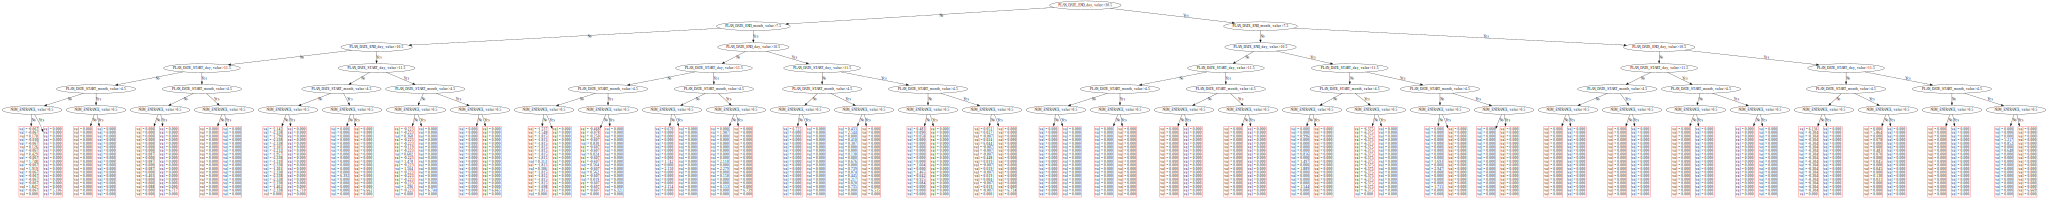

In [559]:
best_model.plot_tree(
    tree_idx=0,
    pool=test_pool
)#.save('best_model.gv')

In [508]:
import graphviz
with open('best_model.gv') as f:
    dot_graph = f.read()
    # print(dot_graph)
    dot_graph = dot_graph.replace(", value", " ")
    dot_graph = dot_graph.replace("val =", "")
dot=graphviz.Source(dot_graph)
dot.view()

'Source.gv.pdf'

### Дампим комбинированный новый (комплексный) датасет

In [568]:
df_merged.to_csv('complex_df.csv')

### Предиктим дату окончания фактического обслуживания

In [589]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

new_df_tmp = new_df_tmp.fillna(0)

features = ['PLAN_DATE_START_year',  'PLAN_DATE_START_month',  'PLAN_DATE_START_day',  'PLAN_DATE_END_year',  
            'PLAN_DATE_END_month',  'PLAN_DATE_END_day',  'FACT_DATE_START_year',  'FACT_DATE_START_month',  
            'FACT_DATE_START_day',
            'external_create_date_year',  'external_create_date_month',  'external_create_date_day',  'done_date_year', 
            'done_date_month',  'done_date_day', 'close_date_year',  'close_date_month',  'close_date_day']

# Определение входных признаков и целевой переменной
X = new_df_tmp[features]
y = new_df_tmp['FACT_DATE_END_day']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

filename = 'FACT_DATE_END_day.sav'
pickle.dump(model, open(filename, 'wb'))

# Прогнозирование даты фактического события
y_pred = model.predict(X_test)

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 69.22860315415666


### Предиктим дату начала фактического обслуживания

In [590]:
from sklearn.metrics import mean_absolute_error

new_df_tmp = new_df_tmp.fillna(0)

features = ['PLAN_DATE_END_year',  
            'PLAN_DATE_END_month',  'PLAN_DATE_END_day',  'FACT_DATE_START_year',  'FACT_DATE_START_month',  
            'FACT_DATE_END_year',  'FACT_DATE_END_month',  'FACT_DATE_END_day',  
            'external_create_date_year',  'external_create_date_month',  'external_create_date_day',  'done_date_year', 
            'done_date_month',  'done_date_day', 'close_date_year',  'close_date_month',  'close_date_day']

features = new_df_tmp[features]
labels = new_df_tmp['FACT_DATE_START_day']

# train \ test split
train_size = int(0.8 * len(new_df_tmp))
train_features = features[:train_size]
train_labels = labels[:train_size]
test_features = features[train_size:]
test_labels = labels[train_size:]

# CatBoost regression
model = CatBoostRegressor()
model.fit(train_features, train_labels, verbose=False, plot=False)

filename = 'FACT_DATE_START_day.sav'
pickle.dump(model, open(filename, 'wb'))

# predict
predictions = model.predict(test_features)

# mae detect
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 5.701207392093619


### Предсказываем место вероятного инцидента (UNOM)

In [445]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and target variable
X = new_df_tmp.drop('UNOM', axis=1)
y = new_df_tmp['UNOM']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost classifier
model = CatBoostClassifier(iterations=10, learning_rate=0.1, random_seed=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:")
print(accuracy_score(y_test, y_pred))
print("Accuracy not normalized:")
print(accuracy_score(y_test, y_pred, normalize=False))

0:	learn: 4.8031770	total: 29.5s	remaining: 4m 25s
1:	learn: 4.3750148	total: 57.2s	remaining: 3m 48s
2:	learn: 3.8855793	total: 1m 25s	remaining: 3m 18s
3:	learn: 3.2290013	total: 1m 53s	remaining: 2m 50s
4:	learn: 2.8533117	total: 2m 23s	remaining: 2m 23s
5:	learn: 2.6518790	total: 2m 54s	remaining: 1m 56s
6:	learn: 2.3000333	total: 3m 26s	remaining: 1m 28s
7:	learn: 2.1187547	total: 3m 58s	remaining: 59.5s
8:	learn: 1.9440767	total: 4m 29s	remaining: 29.9s
9:	learn: 1.8971132	total: 5m	remaining: 0us
Accuracy:
0.6209731942185759
Accuracy normalized:
67968


### Предсказание вероятности наступления события Х

In [448]:
from sklearn.metrics import mean_absolute_error

new_df_tmp = new_df_tmp.fillna(0)

features = new_df_tmp.drop('WORK_NAME_remont_kryshi', axis=1)
labels = new_df_tmp['WORK_NAME_remont_kryshi']

# train \ test split
train_size = int(0.8 * len(new_df_tmp))
train_features = features[:train_size]
train_labels = labels[:train_size]
test_features = features[train_size:]
test_labels = labels[train_size:]

# CatBoost regression
model = CatBoostRegressor()
model.fit(train_features, train_labels, verbose=False, plot=False)

# predict
predictions = model.predict(test_features)

# mae detect
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 0.03398731355556069


In [321]:
print(new_df_tmp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547266 entries, 0 to 547265
Columns: 413 entries, PERIOD to freight_elevators_0
dtypes: float64(5), int32(18), int64(390)
memory usage: 1.6 GB
None


In [374]:
new_df_tmp.dtypes

PERIOD                              int64
NUM_ENTRANCE                      float64
UNOM                                int64
PLAN_DATE_START_year                int32
PLAN_DATE_START_month               int32
                                   ...   
COL_781_22289214                    int64
management_status_MKD_45063109      int64
management_status_MKD_45063584      int64
management_status_MKD_45063585      int64
freight_elevators_0                 int64
Length: 413, dtype: object

In [319]:
new_df_tmp.shape

(547266, 413)

In [569]:
#new_df_tmp.describe()

In [375]:
new_df_tmp["UNOM"].unique()

In [300]:
new_df_tmp.loc[new_df_tmp["UNOM"] == 18964]

global_id  PERIOD  NUM_ENTRANCE   UNOM  PLAN_DATE_START_year  PLAN_DATE_START_month  PLAN_DATE_START_day  PLAN_DATE_END_year  PLAN_DATE_END_month  PLAN_DATE_END_day  FACT_DATE_START_year  FACT_DATE_START_month  FACT_DATE_START_day  FACT_DATE_END_year  FACT_DATE_END_month  FACT_DATE_END_day  external_create_date_year  external_create_date_month  external_create_date_day  done_date_year  done_date_month  done_date_day  close_date_year  close_date_month  close_date_day  PARENT_ID  apartments  total_area  living_area  nonliving_area  WORK_NAME_remont_fasadov  WORK_NAME_remont_kryshi  WORK_NAME_remont_musoroprovoda  WORK_NAME_remont_podezdov_napravlennyi_na_vosstanovlenie_ikh_nadlezhashchego_sostoianiia_i_provodimyi_pri_vypolnenii_inykh_rabot_po_kapitalnomu_remontu_obshchego_imushchestva_v_mnogokvartirnom_dome  WORK_NAME_remont_podvalnykh_pomeshchenii_otnosiashchikhsia_k_obshchemu_imushchestvu_v_mnogokvartirnom_dome  WORK_NAME_remont_pozharnogo_vodoprovoda  WORK_NAME_remont_vnutrennego_vodostoka  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_elektrosnabzheniia  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_gazosnabzheniia  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_razvodiashchie_magistrali  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_goriachego_vodosnabzheniia_stoiaki  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_razvodiashchie_magistrali  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_kholodnogo_vodosnabzheniia_stoiaki  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_teplosnabzheniia_razvodiashchie_magistrali  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_teplosnabzheniia_stoiaki  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_vodootvedeniia_kanalizatsii_stoiaki  WORK_NAME_remont_vnutridomovykh_inzhenernykh_sistem_vodootvedeniia_kanalizatsii_vypuski_i_sbornye_truboprovody  WORK_NAME_zamena_liftovogo_oborudovaniia  WORK_NAME_zamena_okonnykh_blokov_raspolozhennykh_v_pomeshcheniiakh_obshchego_polzovaniia  ElevatorNumber_0  ElevatorNumber_1  ElevatorNumber_10  ElevatorNumber_10а  ElevatorNumber_10б  ElevatorNumber_11  ElevatorNumber_12  ElevatorNumber_1а  ElevatorNumber_1б  ElevatorNumber_1в  ElevatorNumber_2  ElevatorNumber_2а  ElevatorNumber_2б  ElevatorNumber_2в  ElevatorNumber_3  ElevatorNumber_3а  ElevatorNumber_3б  ElevatorNumber_4  ElevatorNumber_4а  ElevatorNumber_4б  ElevatorNumber_5  ElevatorNumber_5а  ElevatorNumber_5б  ElevatorNumber_6  ElevatorNumber_6а  ElevatorNumber_6б  ElevatorNumber_7  ElevatorNumber_7а  ElevatorNumber_7б  ElevatorNumber_8  ElevatorNumber_8а  ElevatorNumber_8б  ElevatorNumber_9  ElevatorNumber_9а  ElevatorNumber_9б  incident_name_anomalnoe_znachenie_massy_v_podaiushchem_truboprovode  incident_name_anomalnoe_znachenie_obema_v_obratnom_truboprovode  incident_name_anomalnoe_znachenie_obema_v_podaiushchem_truboprovode  incident_name_anomalnoe_znachenie_otpushchennoi_teplovoi_energii  incident_name_anomalnoe_znachenie_raznitsy_temperatur  incident_name_anomalnoe_znachenie_temperatury_v_obratnom_truboprovode  incident_name_anomalnoe_znachenie_temperatury_v_podaiushchem_truboprovode  incident_name_anomalnoe_znachenie_vremeni_narabotki  incident_name_avariinaia_protechka_s_krovli  incident_name_avariinaia_protechka_trub_v_podezde  incident_name_avariinaia_protechka_v_podezde  incident_name_avariinoe_povrezhdenie_lestnitsy  incident_name_blokirovka_vkhodnoi_dveri  incident_name_datchik_vibratsii  incident_name_gul_shum_na_obekte_ao_mosgaz_zapakh_gaza_na_ulitse  incident_name_gul_shum_vibratsiia_ot_gazoprovoda  incident_name_izmenenie_kanala_sviazi  incident_name_izmenenie_konfiguratsii_uspd  incident_name_kachestvo_vody_rzhavaia_voda  incident_name_kachestvo_vody_voda_s_zapakhom  incident_name_khlopok_gaza  incident_name_kolodtsy_khlopaet_kryshka  incident_name_kolodtsy_liuk_raskolot  incident_name_kolodtsy_liuk_sdvinut  incident_name_kolodtsy_liuk_zanizhen  incident_name_kolodtsy_liuk_zavyshen  inci

In [323]:
new_df_tmp[new_df_tmp["WORK_NAME_remont_kryshi"] == 1]["FACT_DATE_START_month"].mean()

4.80669541204399

In [328]:
columns_to_show = ["WORK_NAME_remont_kryshi", "FACT_DATE_START_day", "FACT_DATE_END_day"]
new_df_tmp.groupby(["UNOM"])[columns_to_show].describe(percentiles=[])

WORK_NAME_remont_kryshi                                    FACT_DATE_START_day                                        FACT_DATE_END_day                                       
                        count      mean       std  min  50%  max               count       mean       std   min   50%   max             count       mean       std   min   50%   max
UNOM                                                                                                                                                                                
365                    8203.0  0.076923  0.266486  0.0  0.0  1.0              8203.0  14.000000  9.356769   1.0  18.0  27.0            8203.0  16.384615  7.227936   3.0  18.0  26.0
367                    7008.0  0.083333  0.276405  0.0  0.0  1.0              7008.0  14.333333  9.068294   1.0  19.5  24.0            7008.0  16.916667  9.491535   5.0  17.5  30.0
370                     226.0  0.000000  0.000000  0.0  0.0  0.0               226.0   8.000000  0.000000   8.0   8.0   8.0             226.0  27.000000  0.000000  27.0  27.0  27.0
376                    2592.0  0.125000  0.330783  0.0  0.0  1.0              2592.0  16.750000  9.973759   4.0  14.0  31.0            2592.0  20.000000  3.428489  16.0  18.0  26.0
379                     163.0  1.000000  0.000000  1.0  1.0  1.0               163.0  31.000000  0.000000  31.0  31.0  31.0             163.0  14.000000  0.000000  14.0  14.0  14.0
...                       ...       ...       ...  ...  ...  ...                 ...        ...       ...   ...   ...   ...               ...        ...       ...   ...   ...   ...
82032                  3812.0  0.000000  0.000000  0.0  0.0  0.0              3812.0   9.500000  8.501115   1.0   9.5  18.0            3812.0   8.000000  1.000131   7.0   8.0   9.0
82033                  1183.0  0.000000  0.000000  0.0  0.0  0.0              1183.0  29.000000  0.000000  29.0  29.0  29.0            1183.0  18.000000  0.000000  18.0  18.0  18.0
82036                  1015.0  0.000000  0.000000  0.0  0.0  0.0              1015.0  24.000000  0.000000  24.0  24.0  24.0            1015.0  21.000000  0.000000  21.0  21.0  21.0
82037                   688.0  0.000000  0.000000  0.0  0.0  0.0               688.0  15.500000  5.504001  10.0  15.5  21.0             688.0  23.000000  8.005820  15.0  23.0  31.0
82038                  1140.0  0.000000  0.000000  0.0  0.0  0.0              1140.0  15.500000  5.502414  10.0  15.5  21.0            1140.0  23.000000  8.003511  15.0  23.0  31.0

[373 rows x 18 columns]

C:\Users\user\AppData\Local\Temp\ipykernel_49852\1391631996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_tmp.WORK_NAME_remont_kryshi.values)


0.0

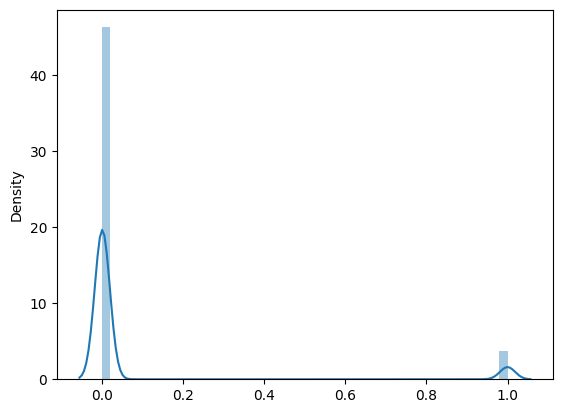

In [193]:
sns.distplot(new_df_tmp.WORK_NAME_remont_kryshi.values)
np.median(new_df_tmp.WORK_NAME_remont_kryshi.values)

In [209]:
df_houses_by_unom = df_multi_houses_characts_tmp.loc[df_multi_houses_characts_tmp['unom'] == 20151]
df_houses_by_unom.head()

ID             NAME  PARENT_ID      LOGIN  dest ownership build_year reconst_year project_series floars entrances apartments total_area living_area nonliving_area construction_volume depreciation_object energyefficiency_class wall_material sign_building_failure passenger_elevators passenger_freight_elevators roof_cleaning   COL_781   unom type_social_object type_housing_stock status_MKD management_status_MKD freight_elevators reason_changing_status_MKD category_MKD
34  1501181.0  ivanteevskaia_1        0.0  404010001  None         0       1968            0       56183245      9         1         72       3140        3074             66                   0                   0                      0     179625102              22728486                   1                           0             0  22289201  20151                  0           42875644   58761330              45063584                 0                          0            0

In [208]:
incidents_by_unom = df_incidents_tmp.loc[df_incidents_tmp['unom'] == 2404461]
incidents_by_unom.head()

incident_name source          address     unom  external_create_date_year  external_create_date_month  external_create_date_day  done_date_year  done_date_month  done_date_day  close_date_year  close_date_month  close_date_day
1  otklonenie_gvs_nizhe_normy_nochiu_monitoring  ASUPR  dmitrievskogo_5  2404461                       2022                           2                        20            1970                1              1           2022.0               4.0             4.0
2    otklonenie_gvs_nizhe_normy_dnem_monitoring  ASUPR  dmitrievskogo_5  2404461                       2022                           3                         7            1970                1              1           2022.0               3.0             9.0
3                   temperatura_gvs_nizhe_normy  ASUPR  dmitrievskogo_5  2404461                       2022                           3                         5            1970                1              1           2022.0               3.0             5.0
4                   temperatura_gvs_nizhe_normy  ASUPR  dmitrievskogo_5  2404461                       2022                           2                        18            1970                1              1           2022.0               2.0            18.0
5                otsutstvuet_tsirkuliatsiia_gvs  ASUPR  dmitrievskogo_5  2404461                       2022                           2                        18            1970                1              1           2022.0               2.0            18.0

In [ ]:
complex_df = df_works_done_tmp

for unom in df_works_done_tmp['UNOM']:
    incidents_by_unom = df_incidents_tmp.loc[df_incidents_tmp['unom'] == unom]

    if len(incidents_by_unom) > 0:
        complex_df['incident_name'] = incidents_by_unom['incident_name']
        complex_df['source'] = incidents_by_unom['source']
        complex_df['external_create_date_year'] = incidents_by_unom['external_create_date_year']
        complex_df['external_create_date_month'] = incidents_by_unom['external_create_date_month']
        complex_df['external_create_date_day'] = incidents_by_unom['external_create_date_day']
        complex_df['done_date_year'] = incidents_by_unom['done_date_year']
        complex_df['done_date_month'] = incidents_by_unom['done_date_month']
        complex_df['done_date_day'] = incidents_by_unom['done_date_day']
        complex_df['close_date_year'] = incidents_by_unom['close_date_year']
        complex_df['close_date_month'] = incidents_by_unom['close_date_month']
        complex_df['close_date_day'] = incidents_by_unom['close_date_day']
        
    # type_housing_stock status_MKD management_status_MKD freight_elevators reason_changing_status_MKD category_MKD 
    objects_by_unom = df_multi_houses_characts_tmp.loc[df_multi_houses_characts_tmp['unom'] == str(unom)]
    if len(objects_by_unom) > 0:
        complex_df['build_year'] = objects_by_unom['build_year']
        complex_df['ownership'] = objects_by_unom['ownership']
        complex_df['reconst_year'] = objects_by_unom['reconst_year']
        complex_df['project_series'] = objects_by_unom['project_series']
        complex_df['floars'] = objects_by_unom['floars']
        complex_df['entrances'] = objects_by_unom['entrances']
        complex_df['apartments'] = objects_by_unom['apartments']
        complex_df['total_area'] = objects_by_unom['total_area']
        complex_df['living_area'] = objects_by_unom['living_area']
        complex_df['nonliving_area'] = objects_by_unom['nonliving_area']
        complex_df['construction_volume'] = objects_by_unom['construction_volume']
        complex_df['nonliving_area'] = objects_by_unom['nonliving_area']
        complex_df['depreciation_object'] = objects_by_unom['depreciation_object']
        complex_df['energyefficiency_class'] = objects_by_unom['energyefficiency_class']
        complex_df['wall_material'] = objects_by_unom['wall_material']
        complex_df['sign_building_failure'] = objects_by_unom['sign_building_failure']
        complex_df['passenger_elevators'] = objects_by_unom['passenger_elevators']
        complex_df['passenger_freight_elevators'] = objects_by_unom['passenger_freight_elevators']
        complex_df['roof_cleaning'] = objects_by_unom['roof_cleaning']
        complex_df['passenger_freight_elevators'] = objects_by_unom['passenger_freight_elevators']
        complex_df['COL_781'] = objects_by_unom['COL_781']
        complex_df['type_social_object'] = objects_by_unom['type_social_object']
        complex_df['type_housing_stock'] = objects_by_unom['type_housing_stock']
        complex_df['status_MKD'] = objects_by_unom['status_MKD']
        complex_df['management_status_MKD'] = objects_by_unom['management_status_MKD']
        complex_df['freight_elevators'] = objects_by_unom['freight_elevators']
        complex_df['reason_changing_status_MKD'] = objects_by_unom['reason_changing_status_MKD']
        complex_df['category_MKD'] = objects_by_unom['category_MKD']
        
print(complex_df.head())
complex_df.to_csv('complex_df.csv')